
### Working: Revised to most recent version of qubitized gates

In [1]:
import numpy    as  np
import cirq     as  cirq
import cirq_ft  as  cirq_ft

import cirq_ft.infra.testing      as     cirq_cqt

from  cirq_ft.infra.jupyter_tools import svg_circuit


from pyLIQTR.qubitization.qubitized_gates  import   QubitizedReflection, QubitizedRotation, QubitizedWalkOperator

from    pyLIQTR.utils.decomposition        import   circuit_decompose_multi      


from pyLIQTR.qubitization.utilities        import  legacy_resource_profile, get_qubits_by_keys
from pyLIQTR.qubitization.qsvt             import  QSVT_real_polynomial, QSP_fourier_response
from pyLIQTR.qubitization.phase_estimation import  QubitizedPhaseEstimation


In [27]:


from pyLIQTR.ProblemInstances.LatticeInstance  import   LatticeInstance
from pyLIQTR.ProblemInstances.spin_models  import   Transverse_Field_Ising, Heisenberg


from pyLIQTR.BlockEncodings.BlockEncoding   import   BlockEncoding
from pyLIQTR.BlockEncodings.getEncoding     import   getEncoding
from pyLIQTR.BlockEncodings                 import   VALID_ENCODINGS

from    pyLIQTR.BlockEncodings.PauliStringLCU                 import   PauliStringLCU


from pyLIQTR.clam.lattice_definitions    import    SquareLattice, TriangularLattice, CubicLattice

<h2><u>QSP and QSVT<u></h2>

<h5><b>Specify Block Encoding</b></h5>

  <hr>

Using random values as phase angles (for demonstration purposes).  Still need to test these new circuits numerically using real angle sequences.

In [5]:
angles = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])*np.pi

<h4><u>1. QSVT: "New" R-Convention Phases </u></h4>

In [7]:
model            =  Transverse_Field_Ising(shape=(4,4),cell=SquareLattice)
block_encoding   =  getEncoding(VALID_ENCODINGS.PauliLCU,model=model )

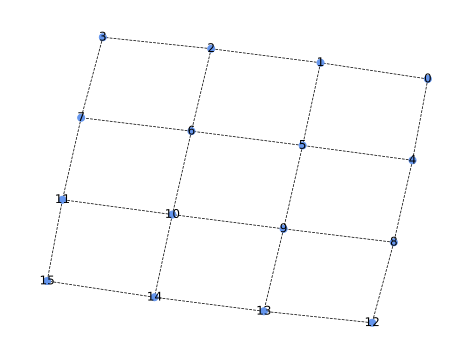

In [8]:
model.draw_lattice()

<h5><b>Invoke QSVT Generator</b></h5>

In [11]:
qsvt_rp_gate         =  QSVT_real_polynomial(block_encoding,angles,instance=model)
qsvt_rp_gate_helper  =  cirq_cqt.GateHelper(qsvt_rp_gate)

<h5><b>Resource Analysis</b></h5>

Gate complexity:

In [12]:
cirq_ft.t_complexity(qsvt_rp_gate)

TComplexity(t=14056, clifford=29494, rotations=9)

<h5><b>Circuit Decomposition & Visualization</b></h5>

In [13]:
circ = qsvt_rp_gate_helper.circuit

In [14]:
print(circ)

phase: ────────QSVT───
               │
selection0: ───QSVT───
               │
selection1: ───QSVT───
               │
selection2: ───QSVT───
               │
selection3: ───QSVT───
               │
selection4: ───QSVT───
               │
selection5: ───QSVT───
               │
target0: ──────QSVT───
               │
target1: ──────QSVT───
               │
target2: ──────QSVT───
               │
target3: ──────QSVT───
               │
target4: ──────QSVT───
               │
target5: ──────QSVT───
               │
target6: ──────QSVT───
               │
target7: ──────QSVT───
               │
target8: ──────QSVT───
               │
target9: ──────QSVT───
               │
target10: ─────QSVT───
               │
target11: ─────QSVT───
               │
target12: ─────QSVT───
               │
target13: ─────QSVT───
               │
target14: ─────QSVT───
               │
target15: ─────QSVT───


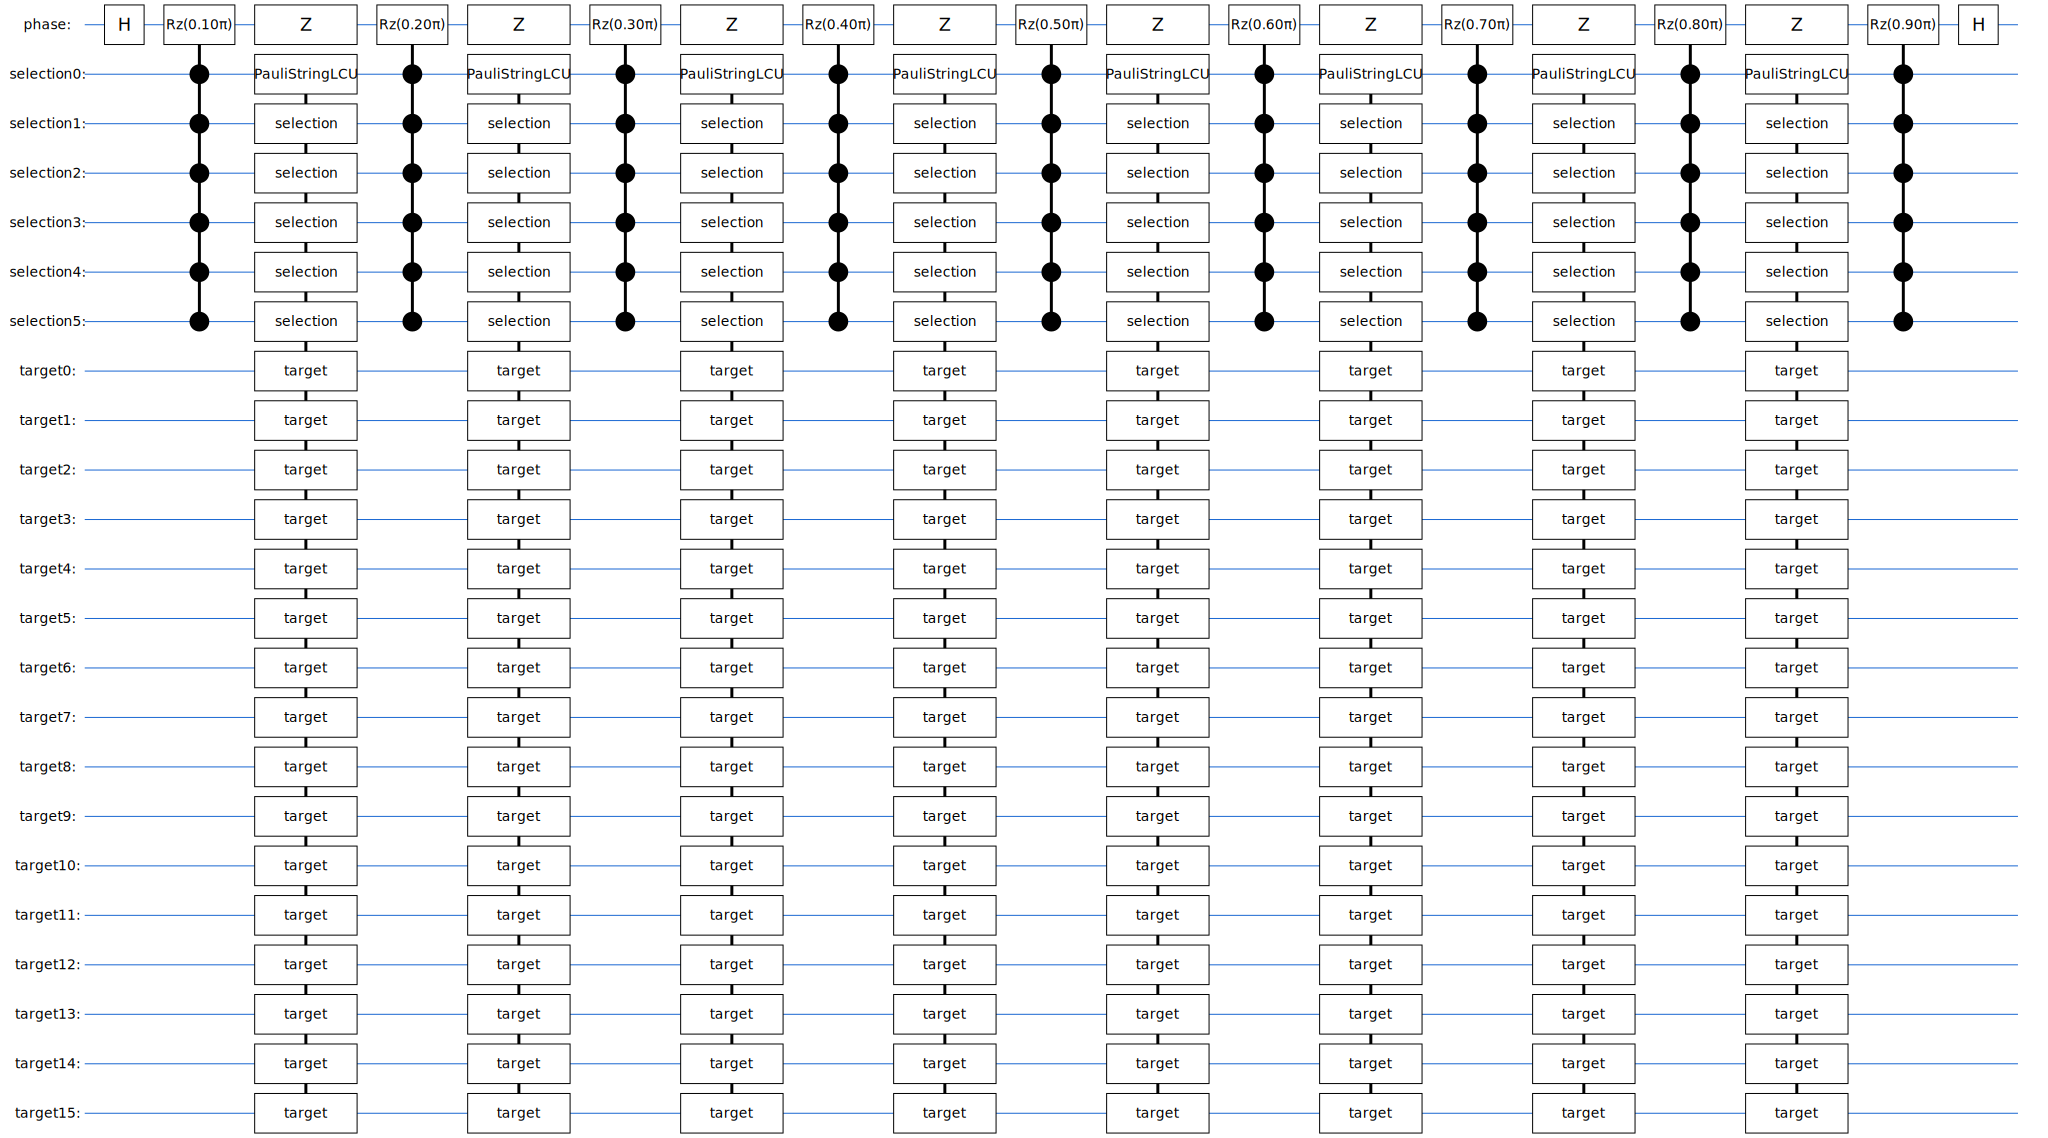

In [15]:
circ_decomp_1 = cirq.Circuit(circuit_decompose_multi(circ,1))

svg_circuit(circ_decomp_1)

Things don't decompose at the "same leve" since the BlockEncoding doesn't leverage inheriance from a cirq_ft gate (this will be changing in the next day or so).  However, we can look at the qubitized rotation to verify all is well:

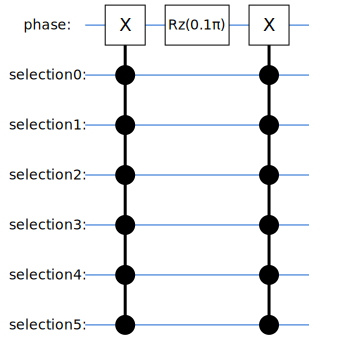

In [16]:
rotation_decomp = cirq.Circuit(circuit_decompose_multi(circ_decomp_1[1:2],1))

svg_circuit(rotation_decomp)

<hr>

<h4><u>2. QSP: Legacy "Fourier response" convention phases (Wz) </u></h4>

<h5><b>Specify Block Encoding</b></h5>

This QSP sequence requires a controlled encoding.  We can either pass an externally created encoding:

In [28]:
model            =  Transverse_Field_Ising(shape=(4,4),cell=SquareLattice)
#block_encoding   =  getEncoding(VALID_ENCODINGS.PauliLCU, do_prepare_inverse=False,control_val=1)

<h5><b>Invoke QSVT Generator</b></h5>

In [29]:
qsp_wz_gate         =  QSP_fourier_response(PauliStringLCU,angles,instance=model)
qsp_wz_gate_helper  =  cirq_cqt.GateHelper(qsp_wz_gate)

# There is a minor bug when buildling the qsp sequence from a pre-generated encoding (see below).
# The method above takes an encoding type and problem instance to build the encoding within the
# qsp generator circuit (the same approach also works with QSVT_real_polynomial)
#
# qsp_wz_gate         =  QSP_fourier_response(block_encoding,angles)
# qsp_wz_gate_helper  =  cirq_cqt.GateHelper(qsp_wz_gate)



<h5><b>Resource Analysis</b></h5>

Gate complexity:

In [30]:
cirq_ft.t_complexity(qsp_wz_gate)

TComplexity(t=8232, clifford=20006, rotations=9)

<h5><b>Circuit Decomposition & Visualization</b></h5>

In [31]:
circ = qsp_wz_gate_helper.circuit

In [32]:
print(circ)

phase: ────────QSVT───
               │
selection0: ───QSVT───
               │
selection1: ───QSVT───
               │
selection2: ───QSVT───
               │
selection3: ───QSVT───
               │
selection4: ───QSVT───
               │
selection5: ───QSVT───
               │
target0: ──────QSVT───
               │
target1: ──────QSVT───
               │
target2: ──────QSVT───
               │
target3: ──────QSVT───
               │
target4: ──────QSVT───
               │
target5: ──────QSVT───
               │
target6: ──────QSVT───
               │
target7: ──────QSVT───
               │
target8: ──────QSVT───
               │
target9: ──────QSVT───
               │
target10: ─────QSVT───
               │
target11: ─────QSVT───
               │
target12: ─────QSVT───
               │
target13: ─────QSVT───
               │
target14: ─────QSVT───
               │
target15: ─────QSVT───


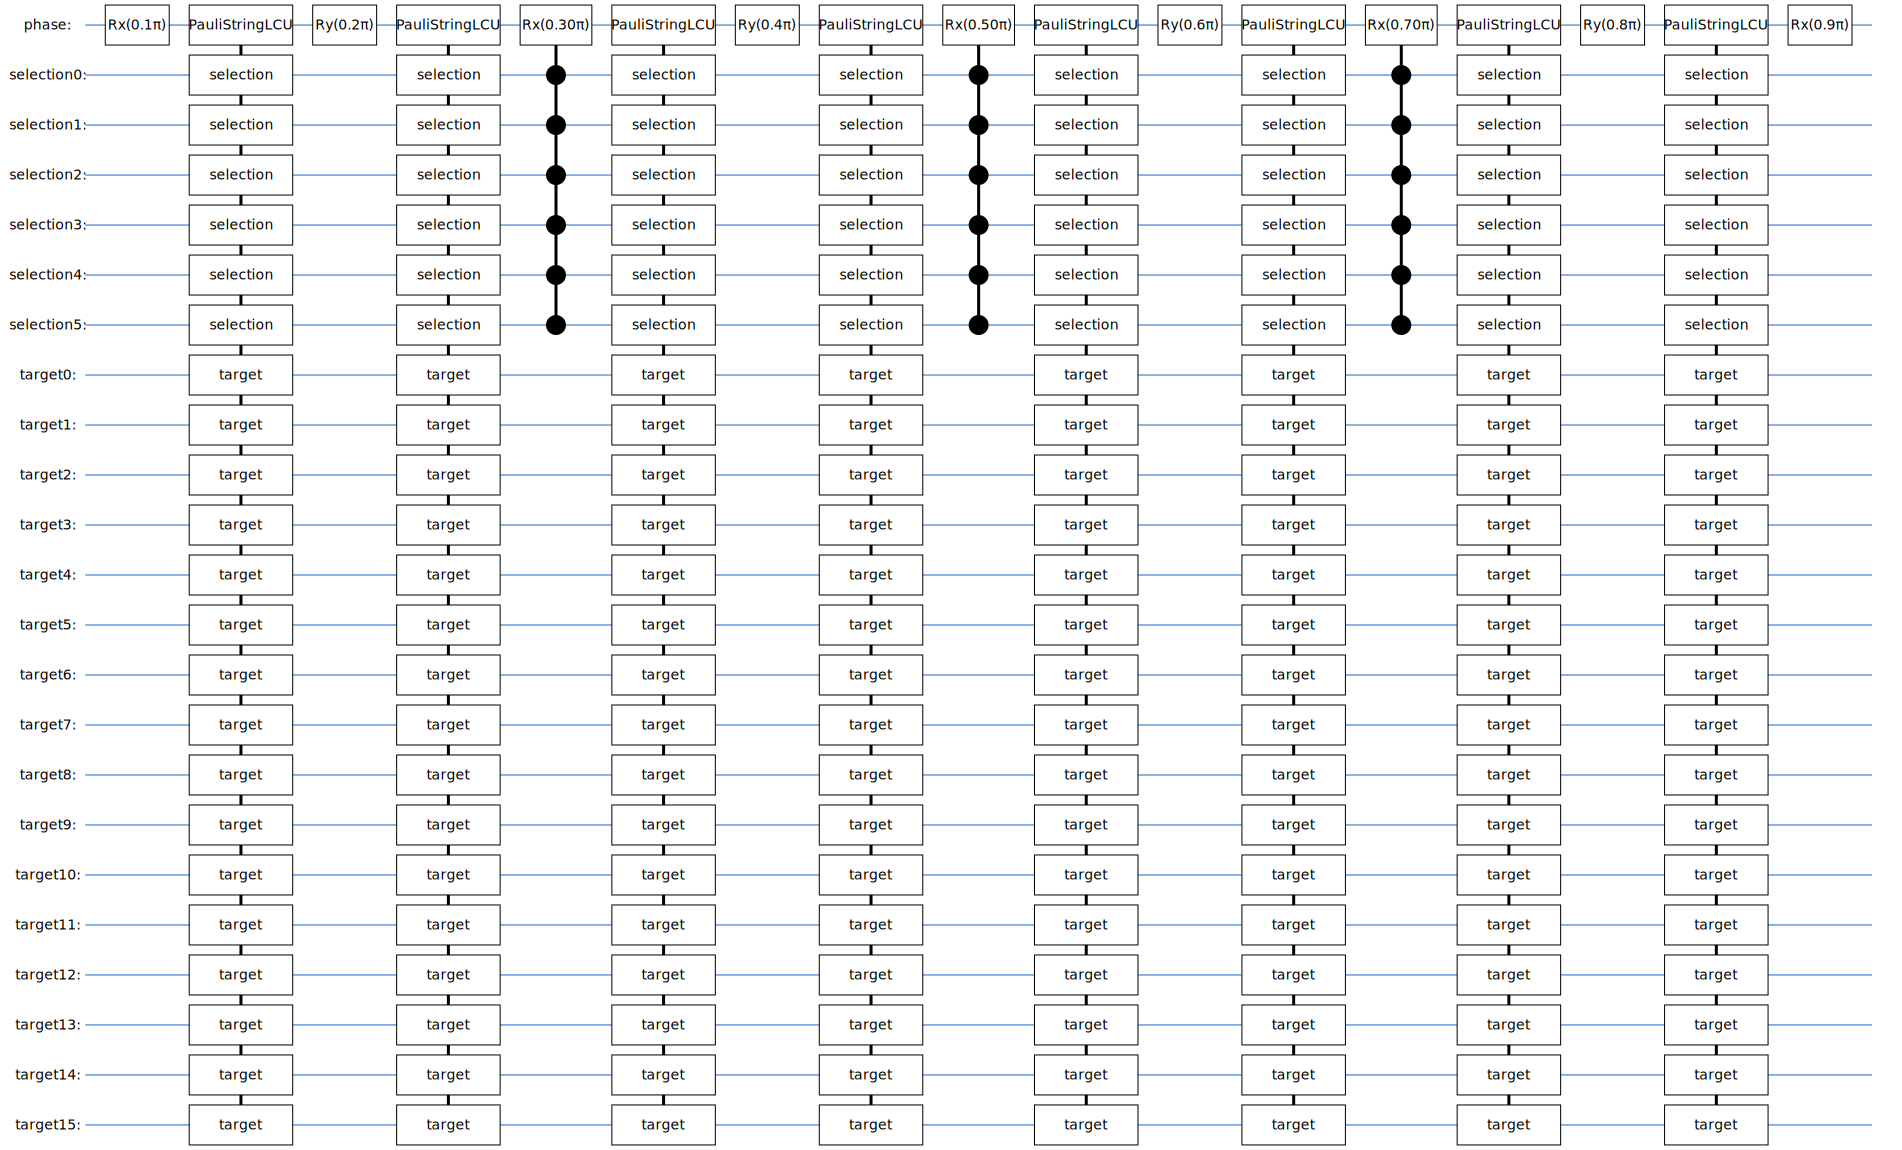

In [33]:
circ_decomp_1 = cirq.Circuit(circuit_decompose_multi(circ,1))

svg_circuit(circ_decomp_1)

<h3><u>3. Broader Examples </u></h3>

<h5><b>2D Heisenberg Model </b></h5>

Profiling can be a bit slow for the PauliLCU $-$  we explicitly build up our old Prepare circuit and convert to Cliffort+$T$ (for now)

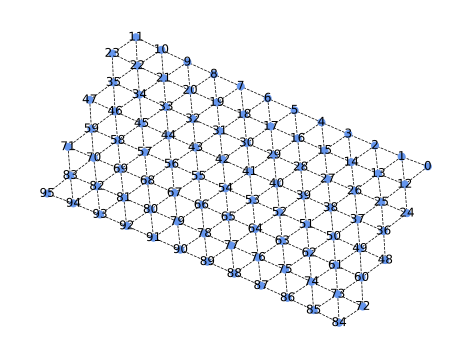

In [34]:
model            =  Heisenberg(shape=(4,4),cell=TriangularLattice)
model.draw_lattice()

In [38]:
block_encoding   =  getEncoding(VALID_ENCODINGS.PauliLCU,instance=model)

In [39]:
qsvt_rp_gate         =  QSVT_real_polynomial(block_encoding,angles)
qsvt_rp_gate_helper  =  cirq_cqt.GateHelper(qsvt_rp_gate)

In [40]:
cirq_ft.t_complexity(qsvt_rp_gate)

TComplexity(t=1657448, clifford=2663798, rotations=9)

<h5><b>3D Heisenberg Model </b></h5>

We can extend to arbitrary 3d Hamiltonians:

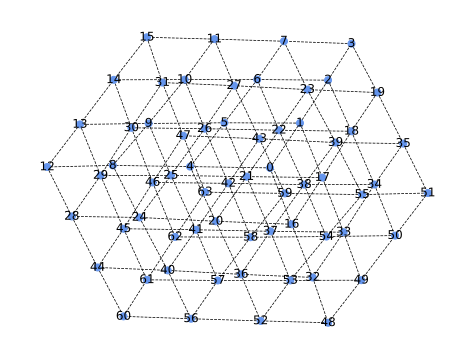

In [41]:
model            =  Heisenberg(shape=(4,4,4),cell=CubicLattice)
model.draw_lattice()

In [42]:
block_encoding   =  getEncoding(VALID_ENCODINGS.PauliLCU)

In [43]:
qsvt_rp_gate         =  QSVT_real_polynomial(block_encoding,angles,instance=model)
qsvt_rp_gate_helper  =  cirq_cqt.GateHelper(qsvt_rp_gate)

In [44]:
cirq_ft.t_complexity(qsvt_rp_gate)

TComplexity(t=136200, clifford=322750, rotations=9)

<h5><b>2D Fermi-Hubbard Model </b></h5>

We will do the 2d Fermi-Hubbard model with the Pauli LCU and an optimized encoding from the Linear-$T$ paper. 

In [26]:
model            =  fermi_hubbard_model(shape=(4,4),cell=SquareLattice)
#model.draw_lattice()

We can also plot this showing the connectivity of the Hamiltonian, which has bipartitle lattices for spin-up and spin-down orbitals:

In [27]:
#model.draw_lattice(single_spin=False)

<h5><b>2D Fermi-Hubbard Model </b></h5>

We build encodings for both the Pauli LCU and Linear-$T$ encoding variants:

In [28]:
block_encoding_fh_linear_t       =  getEncoding(model,VALID_ENCODINGS.FermiHubbardSquare, controlled=False)

In [29]:
block_encoding_fh_pauli_string   =  getEncoding(model,VALID_ENCODINGS.PauliLCU, controlled=False)

Overhead for each block encoding:

In [30]:
cirq_ft.t_complexity(block_encoding_fh_linear_t)

TComplexity(t=552, clifford=1966, rotations=10)

In [31]:
cirq_ft.t_complexity(block_encoding_fh_pauli_string)

TComplexity(t=4024, clifford=14728, rotations=0)

Build the QSVT sequences:

In [32]:
qsvt_rp_gate_fh_linear_t         =  QSVT_real_polynomial(block_encoding_fh_linear_t,angles)
qsvt_rp_gate_fh_pauli_string     =  QSVT_real_polynomial(block_encoding_fh_pauli_string,angles)

Overhead for the QSVT sequences with each encoding:

In [33]:
cirq_ft.t_complexity(qsvt_rp_gate_fh_linear_t)

TComplexity(t=5352, clifford=19814, rotations=89)

In [34]:
cirq_ft.t_complexity(qsvt_rp_gate_fh_pauli_string)

TComplexity(t=32696, clifford=120074, rotations=9)

<h5><b>User-Defined Spin Model </b></h5>

Define Hamiltonian terms for 'A' and 'B' sites on a square checkerboard lattice using a dict:

In [35]:
td       =  {}

td['A']  =  [ [ 'Z', 'X' ], [  0.5,  -1.0 ] ]
td['B']  =  [ [ 'Z', 'X' ], [  0.25, -1.0 ] ]

td['AA'] =  [ [ 'ZZ' ], [ 1.0 ] ]
td['BB'] =  [ [ 'ZZ' ], [ 1.0 ] ]
td['AB'] =  [ [ 'ZZ' ], [ 0.5 ] ]



Make model periodic in one of the dimensions, so we are looking at dynamics on a cylinder:

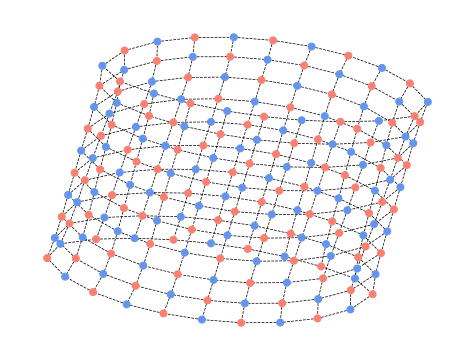

In [36]:
model = LatticeInstance(td=td,shape=(5,10),pbcs=(False,True),cell=SquareLattice,cell_subtype='checkerboard-2')
model.draw_lattice(number_qubits=False)

Total number of lattice sites is:

In [37]:
model.n_qubits()

200

Build the encoding and the QSVT sequence:

In [38]:
block_encoding   =  getEncoding(model,VALID_ENCODINGS.PauliLCU, controlled=False)
qsvt_rp_gate     =  QSVT_real_polynomial(block_encoding,angles)

Resource overhead:

In [39]:
cirq_ft.t_complexity(qsvt_rp_gate)

TComplexity(t=761256, clifford=1448574, rotations=9)